In [1]:
import tifffile
import matplotlib.pyplot as plt
import pandas as pd
from aicspylibczi import CziFile
import matplotlib.pyplot as plt
from PIL import Image
from openpiv import tools, preprocess
import czifile
import numpy as np

In [2]:
# Load image
path="/Users/shaotingting/Library/CloudStorage/OneDrive-Personal/tingtingshao/third_semester_ku_leuven/Integrated_bioinformatics_project/peoject_starting_matrial/IBP-starting-data/ablations_data"
fn=path+"/220830-E6_Out.czi"
czi = CziFile(fn)
img = czifile.imread(fn)
image_data = img.squeeze()
channel0_data = image_data[0]  

# Change the shape
new_shape = (107, 512, 512)
imgsC0 = channel0_data.reshape(new_shape)

In [3]:
imgsC0[0]

array([[10005, 10005, 10004, ..., 10028, 10045, 10088],
       [10007, 10006, 10004, ..., 10046, 10042, 10081],
       [10011, 10008, 10005, ..., 10076, 10053, 10071],
       ...,
       [10100, 10116, 10117, ..., 10002, 10002, 10002],
       [10088, 10092, 10081, ..., 10002, 10002, 10002],
       [10078, 10083, 10066, ..., 10003, 10002, 10003]], dtype=uint16)

(-0.5, 511.5, 511.5, -0.5)

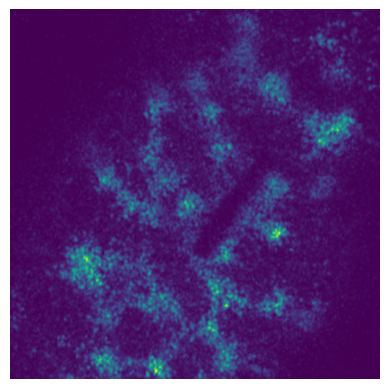

In [4]:
plt.imshow(imgsC0[4])
plt.axis('off')

In [5]:
imgs=tifffile.imread("220830-E6_Out_log.tif")

In [6]:
imgs[0]

array([[27218, 27199, 27172, ..., 26118, 26367, 26720],
       [27263, 27230, 27186, ..., 26697, 26575, 26689],
       [27300, 27255, 27195, ..., 27474, 26955, 26805],
       ...,
       [27886, 27959, 27704, ..., 27159, 27154, 27150],
       [27528, 27477, 27122, ..., 27162, 27160, 27159],
       [27195, 27061, 26652, ..., 27169, 27168, 27168]], dtype=uint16)

(-0.5, 511.5, 511.5, -0.5)

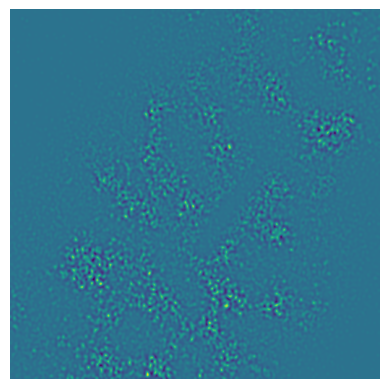

In [7]:
plt.imshow(imgs[4])
plt.axis('off')

(-0.5, 511.5, 551.5, -0.5)

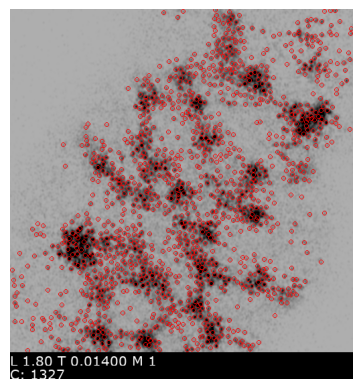

In [8]:
imgs_fit=tifffile.imread("220830-E6_Out_fit.tif")
plt.imshow(imgs_fit[4])
plt.axis('off') # threshold in Gaussian fitting 0.01

(-0.5, 511.5, 511.5, -0.5)

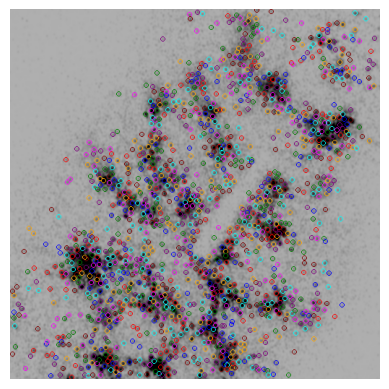

In [9]:
imgs_marked=tifffile.imread("220830-E6_Out_marked.tif")
plt.imshow(imgs_marked[4])
plt.axis('off') # threshold in Gaussian fitting 0.01

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
data = pd.read_csv('220830-E6_Out_regression.txt', delim_whitespace=True)

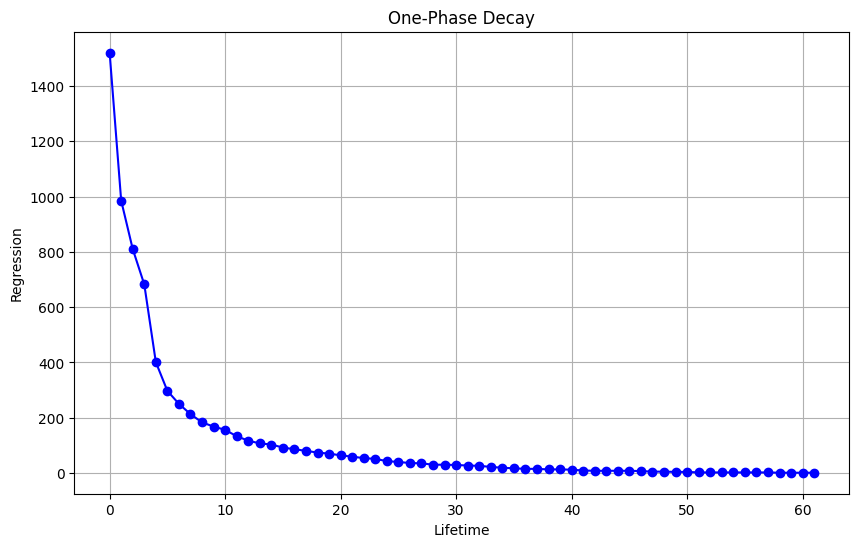

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(data["lifetime"], data["regression"], marker='o', linestyle='-', color='b')
plt.title("One-Phase Decay")
plt.xlabel("Lifetime")
plt.ylabel("Regression")
plt.grid(True)

plt.show()

In [13]:
spot_table = pd.read_csv('220830-E6_Out.txt', comment = '#', sep = '\t')


In [14]:
spot_table = spot_table.sort_values(by = ['total_index', 'plane']).reset_index(drop=True)

In [15]:
spot_table.head

<bound method NDFrame.head of         total_index  plane  index           x           y  diameter  \
0                 0      0      0  305.053361  190.420898  3.834891   
1                 0      1    121  304.982454  191.203443  4.220797   
2                 1      0      1  302.108683  482.795528  3.693972   
3                 1      1     12  301.679516  480.025372  4.662537   
4                 1      2     25  301.438287  479.541591  4.139615   
...             ...    ...    ...         ...         ...       ...   
146664       146664    106   1276    4.997937  488.426184  3.123999   
146665       146665    106   1277  107.314541  180.797108  3.103796   
146666       146666    106   1278  188.455558  308.954068  3.242147   
146667       146667    106   1279  290.181617  448.805299  3.142718   
146668       146668    106   1280  202.974469   92.607217  2.575788   

        intensity  fit_error  chi_square  distance  life_index  life_total  
0           13114   0.067305    0.027186

In [16]:
count_at_plane_0 = len(spot_table[spot_table['plane'] == 0])

In [17]:
count_at_plane_0

1629

In [18]:
count_at_plane_106 = len(spot_table[spot_table['plane'] == 106])
count_at_plane_106

1281

In [19]:
# grouped = spot_table.groupby('plane')